EJEMPLOS

In [56]:
%run FUNCIONES_GENERALES.ipynb


In [57]:
fecha1='1/1/2014'

In [58]:
fecha2='1/1/2024'

In [59]:
columna=['Valor']

In [60]:
periodos=96

MODELO DE TENDENCIA DETERMINISTA:

LINEAL (tipo=1)

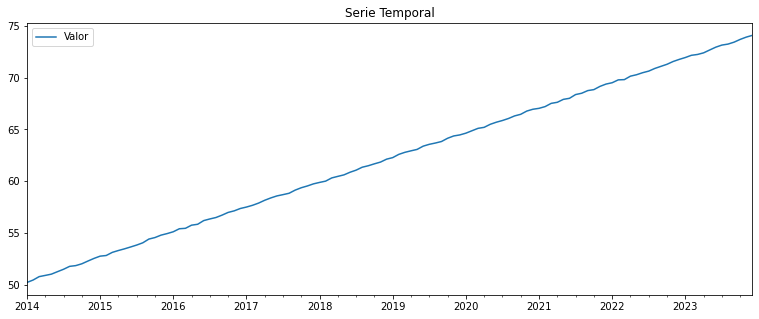

In [61]:
df1=crear_df_fin_tend_det(fecha1,fecha2,'M',columna,[50,0.2],1,0.2)

In [62]:
csv_df(df1,'Ejemplos/Determinista','Lineal-det-fin')

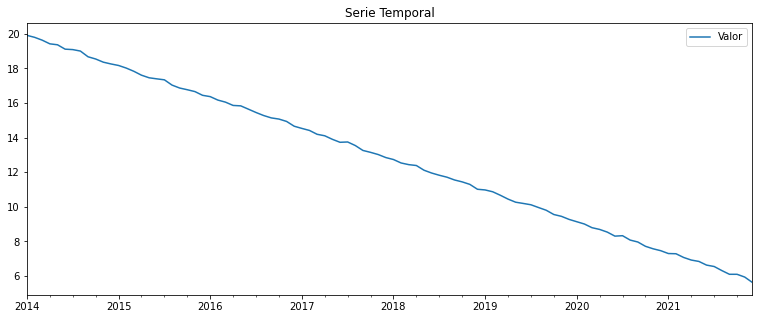

In [63]:
df2=crear_df_periodos_tend_det(fecha1,periodos,'M',columna,[20,-0.15],1,0.2)

In [69]:
csv_df(df2,'Ejemplos/Determinista','Lineal-det-periodos')

POLINÓMICA (TIPO=2)

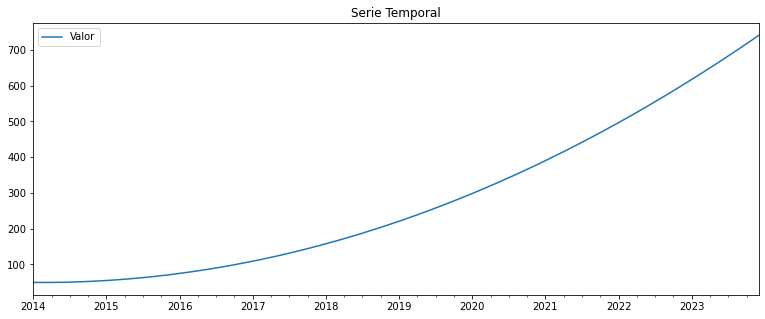

In [65]:
df3=crear_df_fin_tend_det(fecha1,fecha2,'M',columna,[50,-0.25,0.05],2,0.2)

In [68]:
csv_df(df3,'Ejemplos/Determinista','Pol-det-fin')

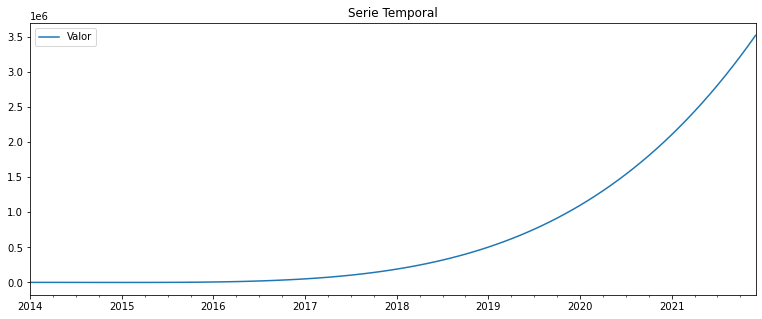

In [67]:
df4=crear_df_periodos_tend_det(fecha1,periodos,'M',columna,[60,-5,-2,-0.8,0.05],2,0.1)

In [70]:
csv_df(df4,'Ejemplos/Determinista','Pol-det-periodos')

EXPONENCIAL (TIPO=3)

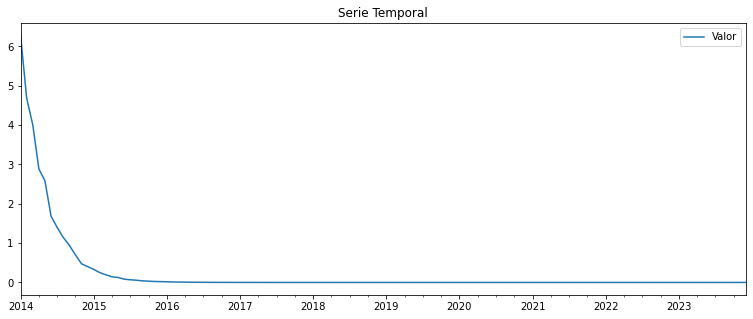

In [71]:
df5=crear_df_fin_tend_det(fecha1,fecha2,'M',columna,[2,-0.25],3,0.2)

In [72]:
csv_df(df5,'Ejemplos/Determinista','Exp-det-fin')

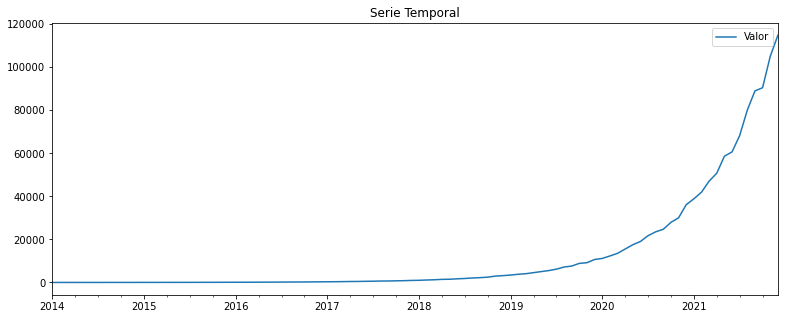

In [73]:
df6=crear_df_periodos_tend_det(fecha1,periodos,'M',columna,[2,0.1],3,0.1)

In [75]:
csv_df(df6,'Ejemplos/Determinista','Exp-det-periodos')

LOGARÍTMICA (TIPO=4)

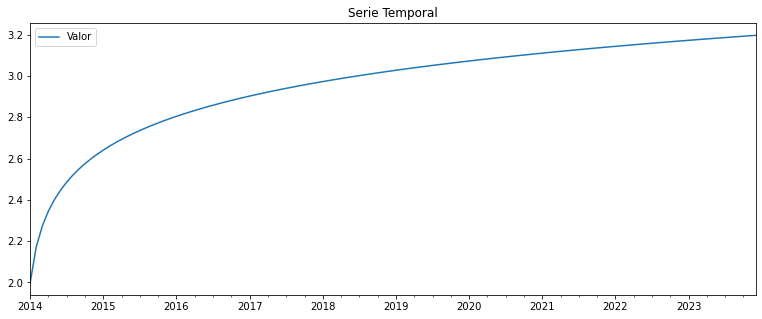

In [77]:
df7=crear_df_fin_tend_det(fecha1,fecha2,'M',columna,[2,0.25],4,0.2)

In [78]:
csv_df(df7,'Ejemplos/Determinista','Log-det-fin')

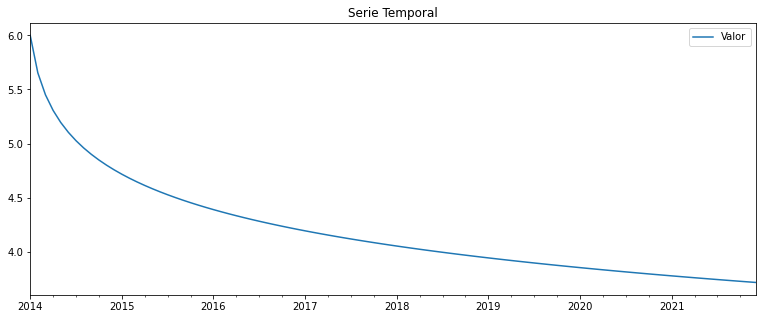

In [79]:
df8=crear_df_periodos_tend_det(fecha1,periodos,'M',columna,[6,-0.5],4,0.2)

In [80]:
csv_df(df8,'Ejemplos/Determinista','Log-det-periodos')

MODELOS SEGÚN CIERTAS DISTRIBUCIONES:

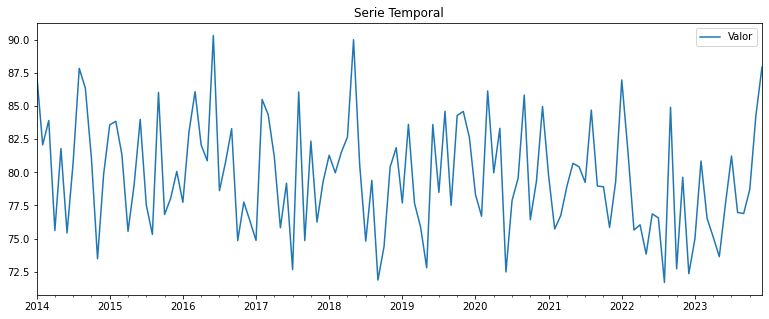

In [81]:
df9=crear_df_fin_datos(fecha1,fecha2,'M',columna,1,[80,4])

In [82]:
csv_df(df9,'Ejemplos/Distribuciones','Normal-fin')

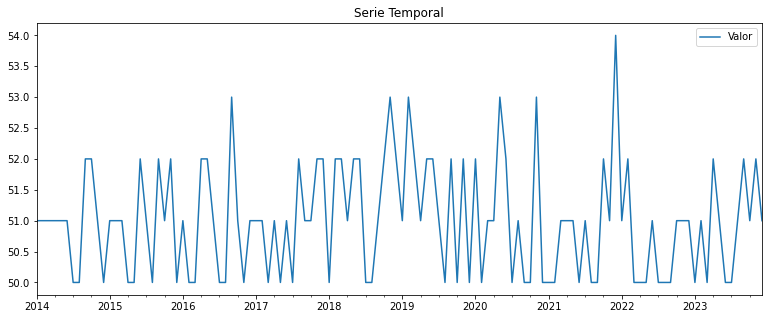

In [83]:
df10=crear_df_fin_datos(fecha1,fecha2,'M',columna,2,[9,0.1,50])

In [84]:
csv_df(df10,'Ejemplos/Distribuciones','Binomial-fin')

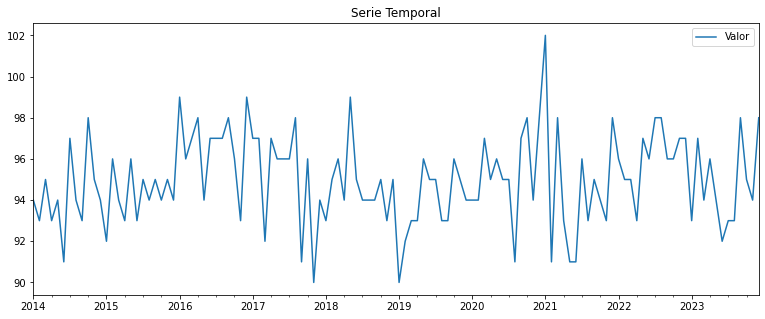

In [85]:
df11=crear_df_fin_datos(fecha1,fecha2,'M',columna,3,[5,90])

In [86]:
csv_df(df11,'Ejemplos/Distribuciones','Poisson-fin')

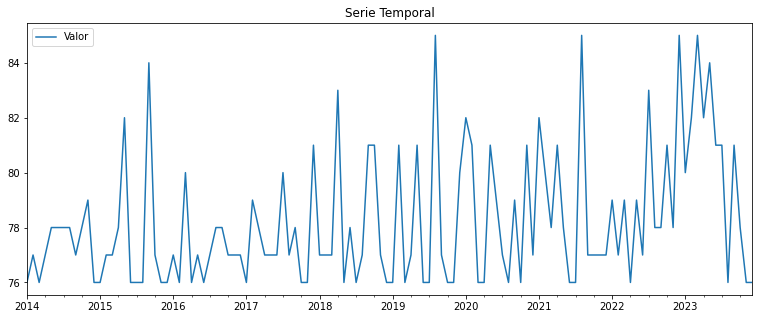

In [87]:
df12=crear_df_fin_datos(fecha1,fecha2,'M',columna,4,[0.3,75])

In [88]:
csv_df(df12,'Ejemplos/Distribuciones','Geometrica-fin')

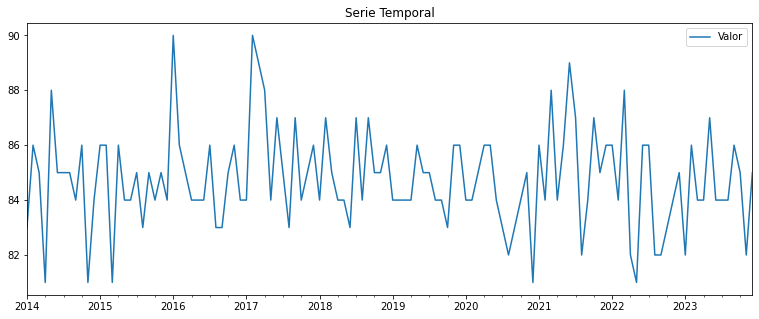

In [89]:
df13=crear_df_fin_datos(fecha1,fecha2,'M',columna,5,[60,17,24,78])

In [90]:
csv_df(df13,'Ejemplos/Distribuciones','Hipergeometrica-fin')

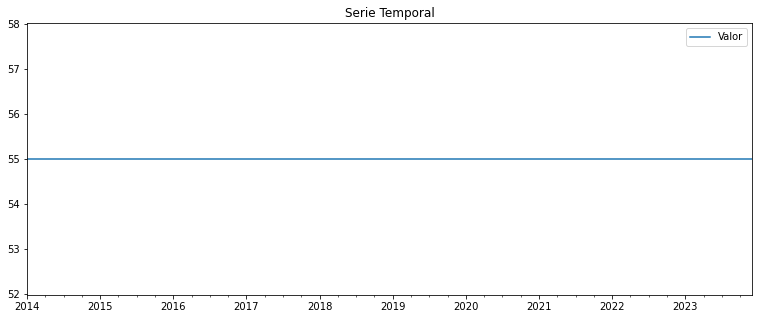

In [91]:
df15=crear_df_fin_datos(fecha1,fecha2,'M',columna,6,[55])

In [92]:
csv_df(df15,'Ejemplos/Distribuciones','Constante-fin')

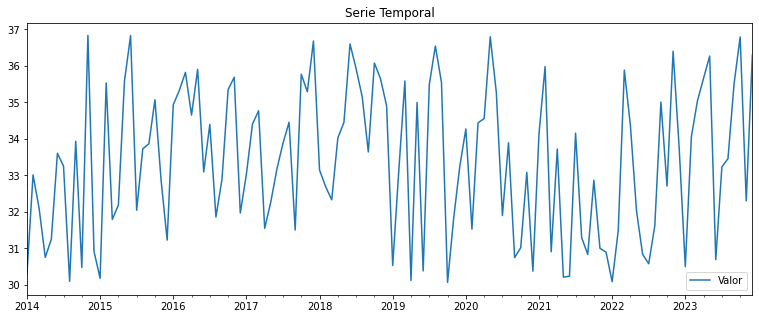

In [93]:
df16=crear_df_fin_datos(fecha1,fecha2,'M',columna,7,[30,7])

In [94]:
csv_df(df16,'Ejemplos/Distribuciones','Uniforme-fin')

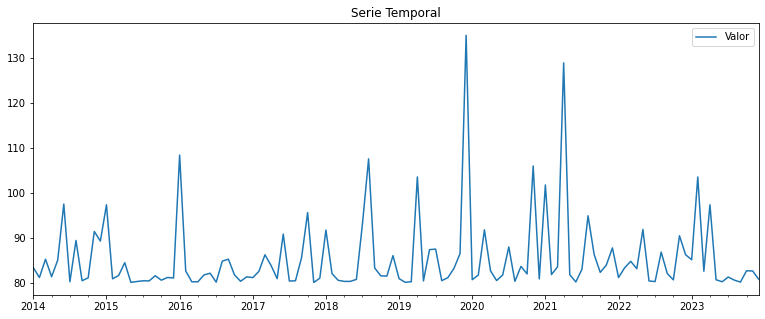

In [95]:
df17=crear_df_fin_datos(fecha1,fecha2,'M',columna,8,[1.5,80,2])

In [96]:
csv_df(df17,'Ejemplos/Distribuciones','Lognormal-fin')

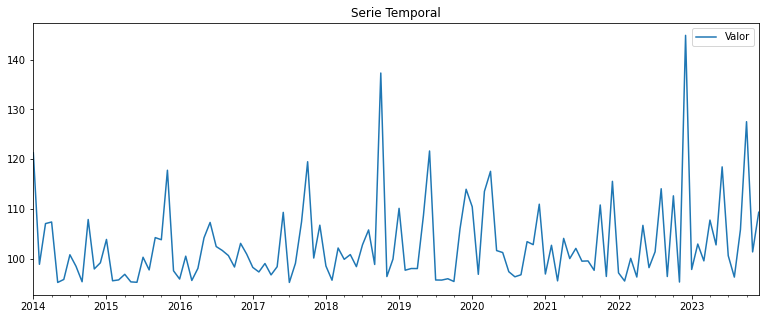

In [97]:
df18=crear_df_fin_datos(fecha1,fecha2,'M',columna,9,[95,7])

In [98]:
csv_df(df18,'Ejemplos/Distribuciones','Exponencial-fin')

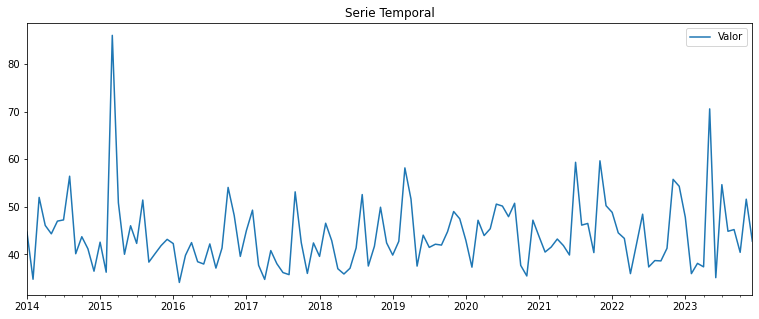

In [99]:
df20=crear_df_fin_datos(fecha1,fecha2,'M',columna,10,[4,32,3])

In [100]:
csv_df(df20,'Ejemplos/Distribuciones','Gamma-fin')

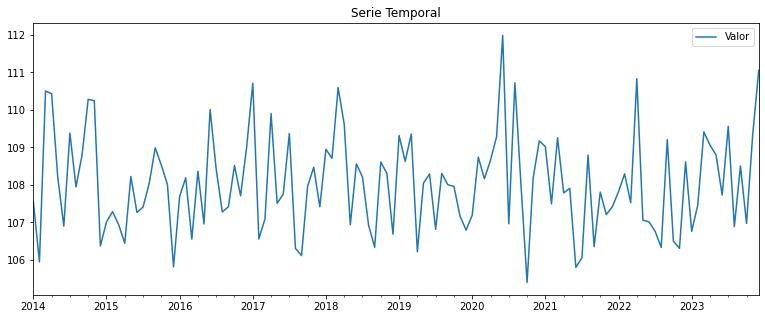

In [101]:
df21=crear_df_fin_datos(fecha1,fecha2,'M',columna,11,[3,5,105,8])

In [102]:
csv_df(df21,'Ejemplos/Distribuciones','Beta-fin')

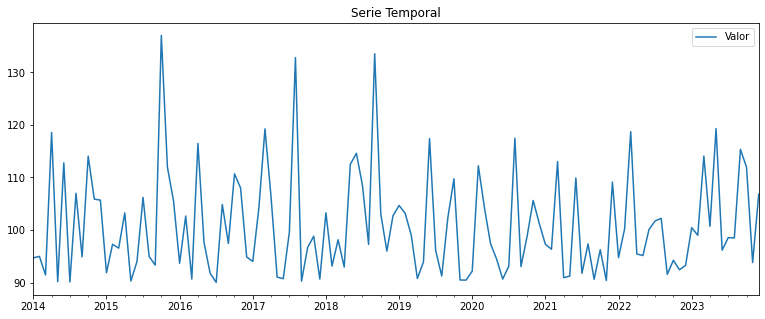

In [103]:
df22=crear_df_fin_datos(fecha1,fecha2,'M',columna,12,[2,90,5])

In [104]:
csv_df(df22,'Ejemplos/Distribuciones','Chi_cuadrado-fin')

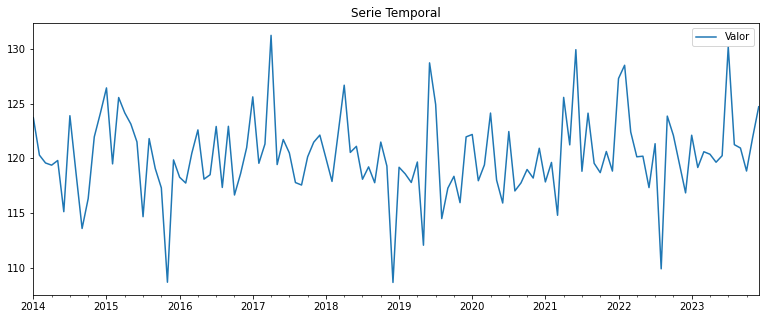

In [105]:
df23=crear_df_fin_datos(fecha1,fecha2,'M',columna,13,[6,120,3])

In [106]:
csv_df(df23,'Ejemplos/Distribuciones','T_student-fin')

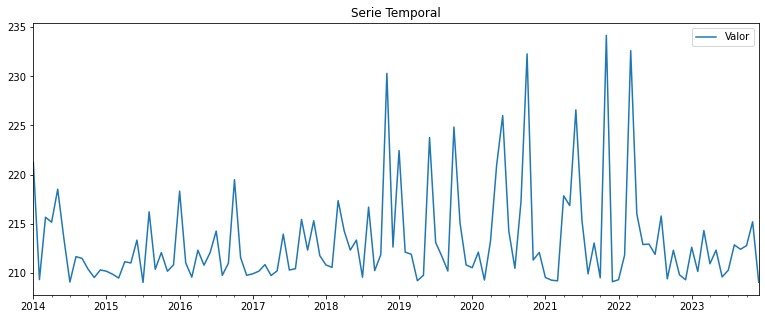

In [107]:
df24=crear_df_fin_datos(fecha1,fecha2,'M',columna,14,[3,200,9])

In [108]:
csv_df(df24,'Ejemplos/Distribuciones','Pareto-fin')

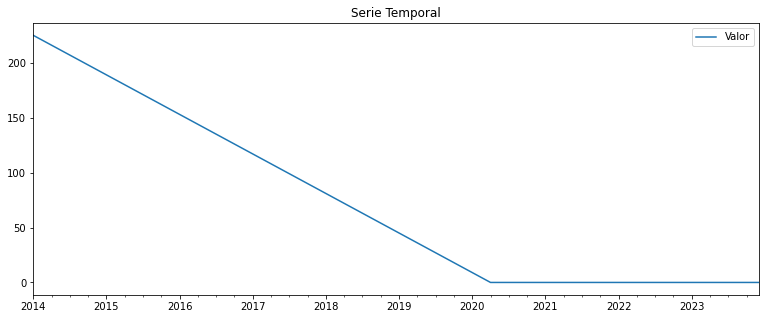

In [109]:
df25=crear_df_fin_datos(fecha1,fecha2,'M',columna,15,[225,3])

In [110]:
csv_df(df25,'Ejemplos/Distribuciones','Lineal-desc-fin')

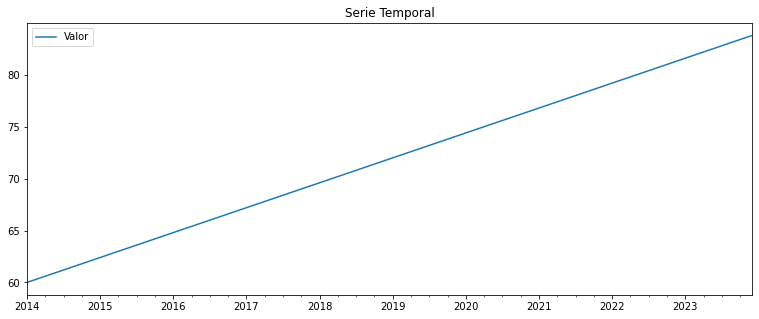

In [112]:
df26=crear_df_fin_datos(fecha1,fecha2,'M',columna,16,[60,0.2])

In [113]:
csv_df(df26,'Ejemplos/Distribuciones','Lineal-asc-fin')

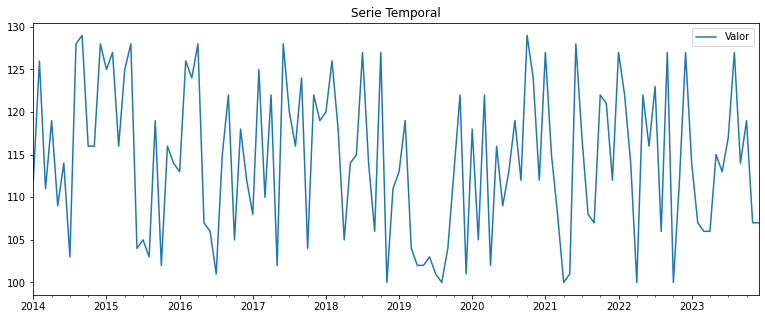

In [114]:
df27=crear_df_fin_datos(fecha1,fecha2,'M',columna,17,[100,130])

In [115]:
csv_df(df27,'Ejemplos/Distribuciones','Aleatorio-fin')

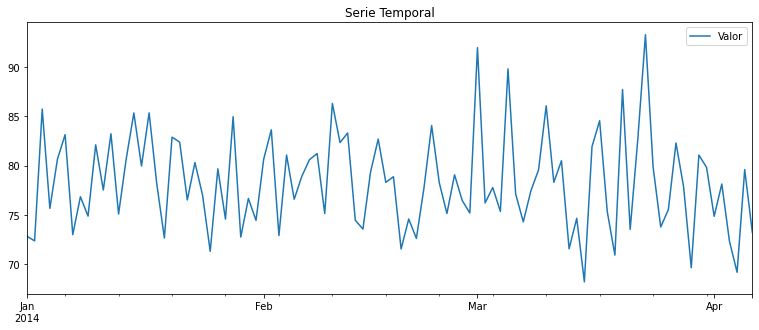

In [116]:
df28=crear_df_periodos_datos(fecha1,periodos,'D',columna,1,[79,5])

In [126]:
csv_df(df28,'Ejemplos/Distribuciones','Normal-periodos')

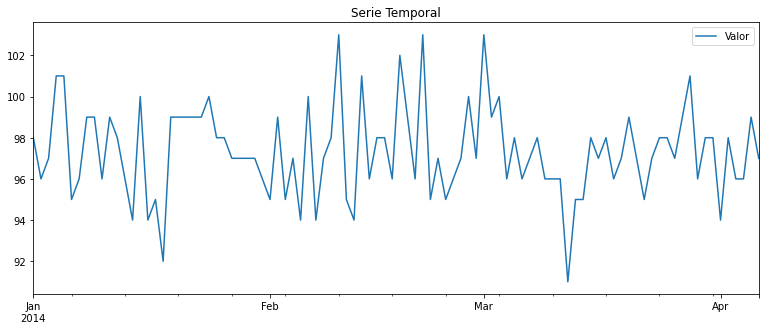

In [118]:
df29=crear_df_periodos_datos(fecha1,periodos,'D',columna,2,[25,0.3,90])

In [119]:
csv_df(df29,'Ejemplos/Distribuciones','Binomial-periodos')

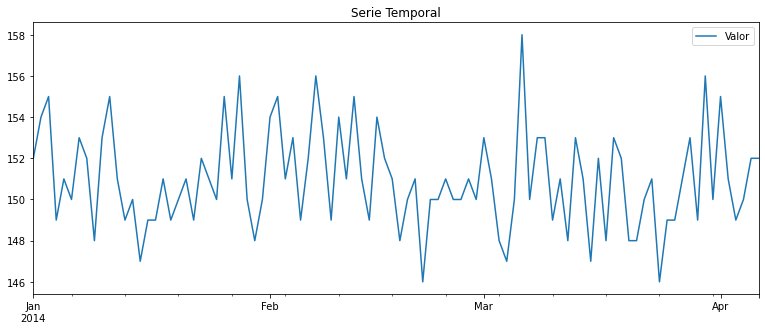

In [120]:
df30=crear_df_periodos_datos(fecha1,periodos,'D',columna,3,[6,145])

In [122]:
csv_df(df30,'Ejemplos/Distribuciones','Poisson-periodos')

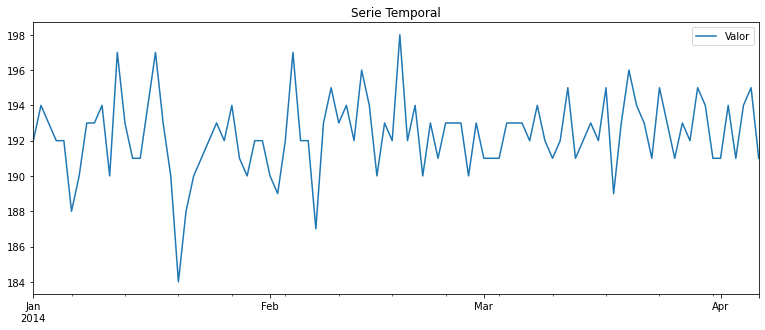

In [123]:
df31=crear_df_periodos_datos(fecha1,periodos,'D',columna,5,[80,33,30,180])

In [133]:
csv_df(df31,'Ejemplos/Distribuciones','Hipergeometrica-periodos')

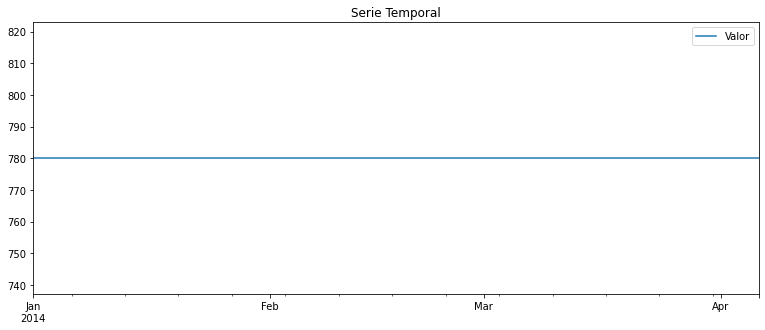

In [125]:
df32=crear_df_periodos_datos(fecha1,periodos,'D',columna,6,[780])

In [132]:
csv_df(df32,'Ejemplos/Distribuciones','Constante-periodos')

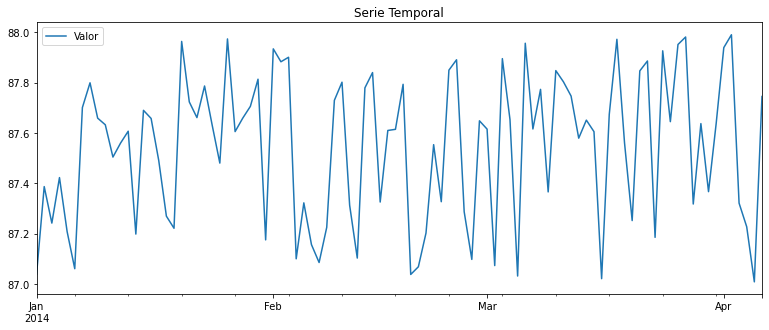

In [129]:
df33=crear_df_periodos_datos(fecha1,periodos,'D',columna,7,[87])

In [137]:
csv_df(df33,'Ejemplos/Distribuciones','Uniforme-periodos')

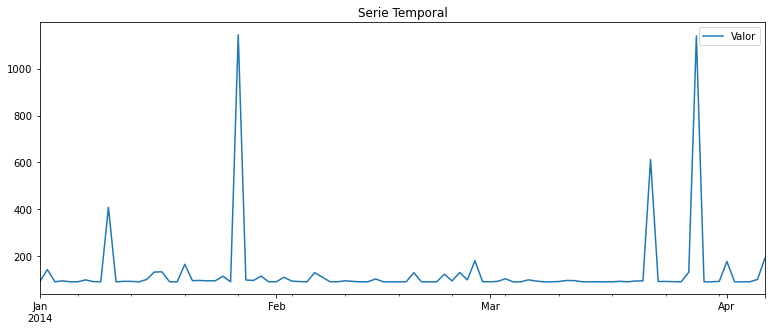

In [131]:
df34=crear_df_periodos_datos(fecha1,periodos,'D',columna,8,[3,90])

In [136]:
csv_df(df34,'Ejemplos/Distribuciones','Lognormal-periodos')

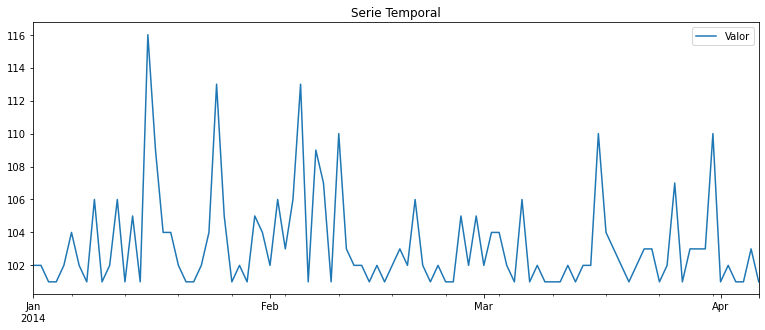

In [134]:
df35= crear_df_periodos_datos(fecha1,periodos,'D',columna,4,[0.34,100])

In [135]:
csv_df(df35,'Ejemplos/Distribuciones','Geometrica-periodos')

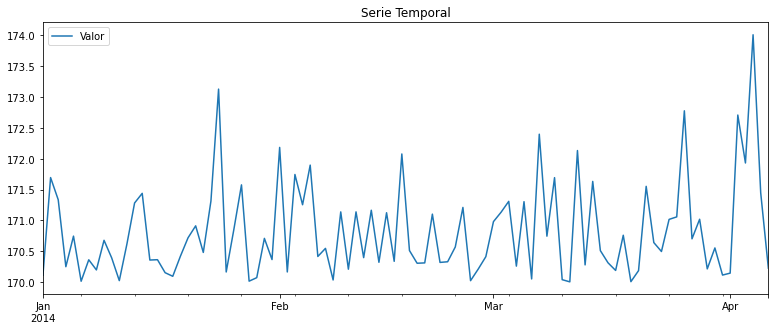

In [138]:
df36=crear_df_periodos_datos(fecha1,periodos,'D',columna,9,[170])

In [139]:
csv_df(df36,'Ejemplos/Distribuciones','Exponencial-periodos')

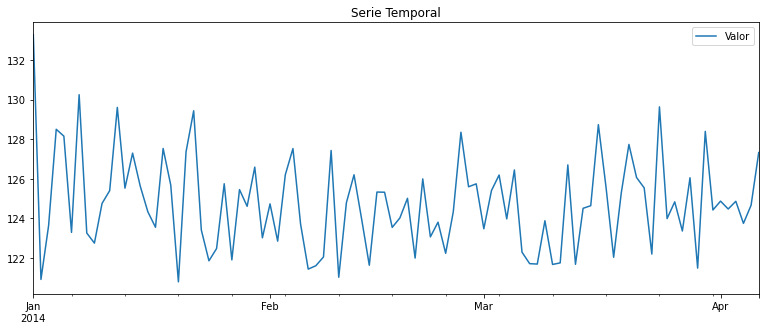

In [140]:
df37=crear_df_periodos_datos(fecha1,periodos,'D',columna,10,[5,120])

In [141]:
csv_df(df37,'Ejemplos/Distribuciones','Gamma-periodos')

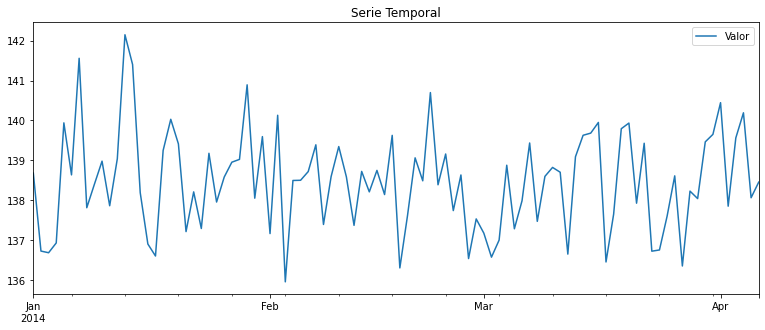

In [142]:
df38=crear_df_periodos_datos(fecha1,periodos,'D',columna,11,[4,8,135,10])

In [143]:
csv_df(df38,'Ejemplos/Distribuciones','Beta-periodos')

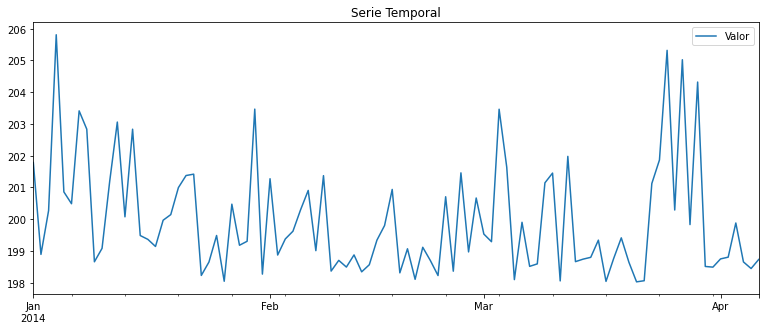

In [144]:
df39=crear_df_periodos_datos(fecha1,periodos,'D',columna,12,[2,198])

In [145]:
csv_df(df39,'Ejemplos/Distribuciones','Chi_cuadrado-periodos')

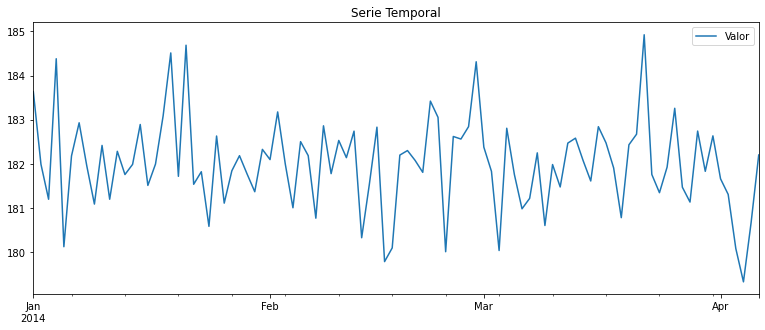

In [146]:
df40=crear_df_periodos_datos(fecha1,periodos,'D',columna,13,[9,182])

In [147]:
csv_df(df40,'Ejemplos/Distribuciones','T_Student-periodos')

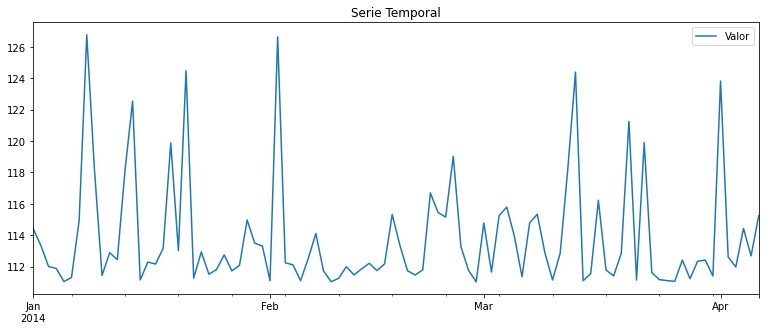

In [148]:
df41=crear_df_periodos_datos(fecha1,periodos,'D',columna,14,[6,96,15])

In [149]:
csv_df(df41,'Ejemplos/Distribuciones','Pareto-periodos')

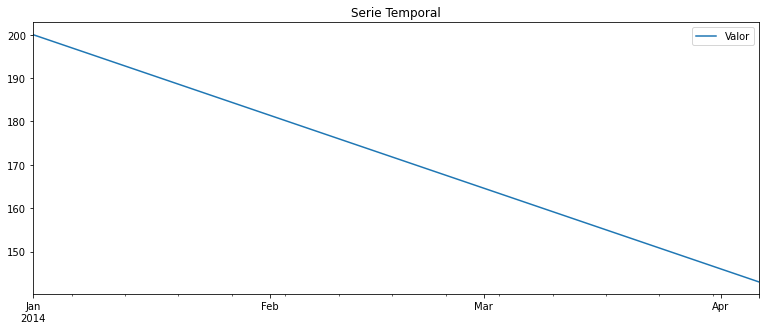

In [150]:
df42=crear_df_periodos_datos(fecha1,periodos,'D',columna,15,[200,0.6])

In [151]:
csv_df(df42,'Ejemplos/Distribuciones','Lineal-desc-periodos')

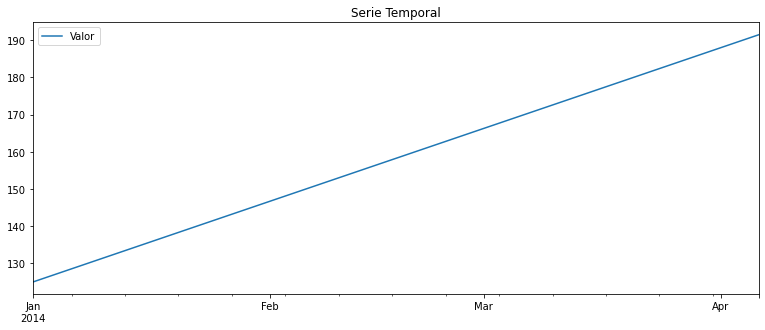

In [152]:
df43=crear_df_periodos_datos(fecha1,periodos,'D',columna,16,[125,0.7])

In [153]:
csv_df(df43,'Ejemplos/Distribuciones','Lineal-asc-periodos')

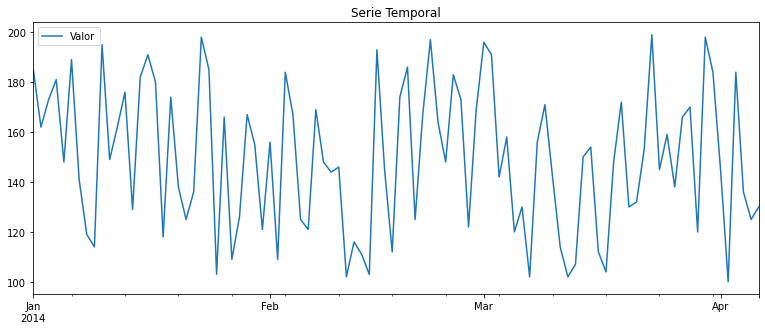

In [154]:
df44=crear_df_periodos_datos(fecha1,periodos,'D',columna,17,[100,200])

In [155]:
csv_df(df44,'Ejemplos/Distribuciones','Aleatorio-periodos')

MODELOS PERIÓDICOS 

In [156]:
distr_per=1

In [157]:
params_per=[650,25]

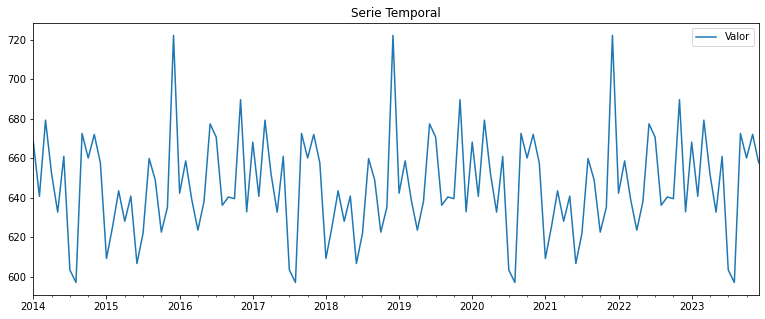

In [161]:
df45=crear_df_fin_periodicos(fecha1,fecha2,'M',columna,distr_per,params_per,36,1)

In [162]:
csv_df(df45,'Ejemplos/Periodicas','Amplitud-fin')

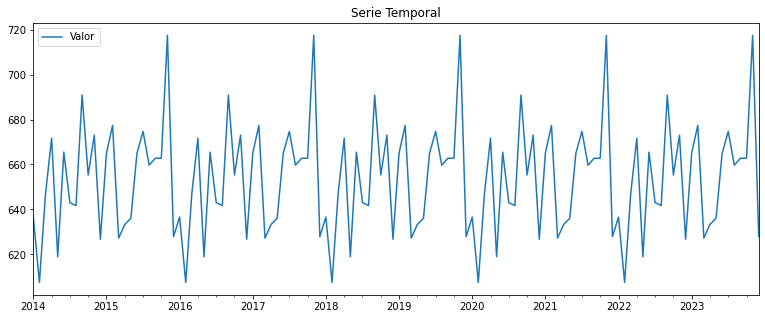

In [164]:
df46=crear_df_fin_periodicos(fecha1,fecha2,'M',columna,distr_per,params_per,5,2)

In [165]:
csv_df(df46,'Ejemplos/Periodicas','Cantidad-fin')

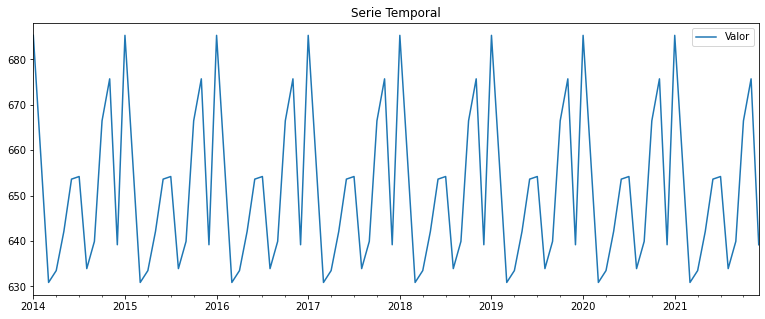

In [166]:
df47=crear_df_periodos_periodicos(fecha1,periodos,'M',columna,distr_per,params_per,12,1)

In [167]:
csv_df(df47,'Ejemplos/Periodicas','Amplitud-periodos')

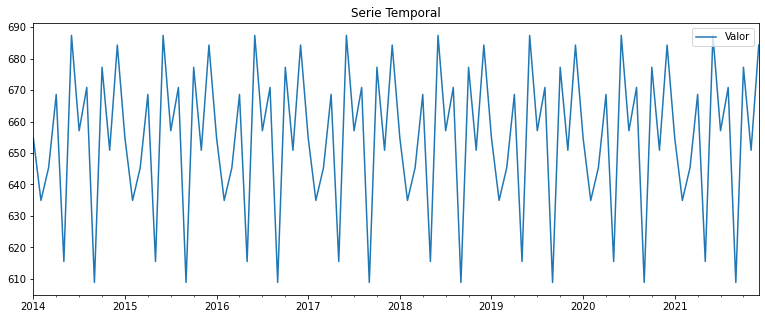

In [169]:
df48=crear_df_periodos_periodicos(fecha1,periodos,'M',columna,distr_per,params_per,8,2)

In [170]:
csv_df(df48,'Ejemplos/Periodicas','Cantidad-periodos')

MODELOS ARMA (AUTORREGRESIVOS Y DE MEDIAS MÓVILES)

In [171]:
c = 125

In [172]:
params_ARMA = 0.8

In [173]:
s = 4

In [174]:
phi = [0.3,0.2]

In [175]:
teta = [1.4]

In [176]:
a = []

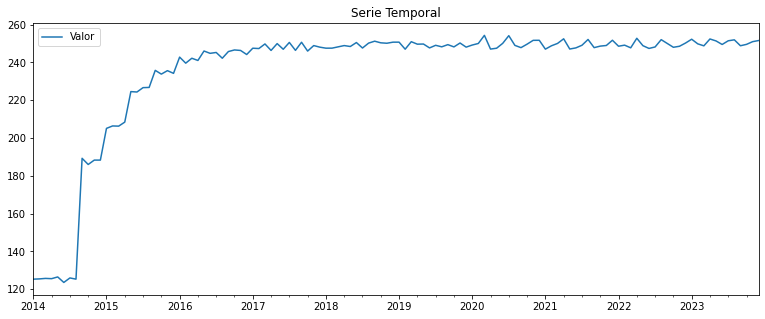

In [177]:
df49=crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,params_ARMA,s,phi,teta,a)

In [184]:
csv_df(df49,'Ejemplos/ARMA','ARMA-estacional-fin')

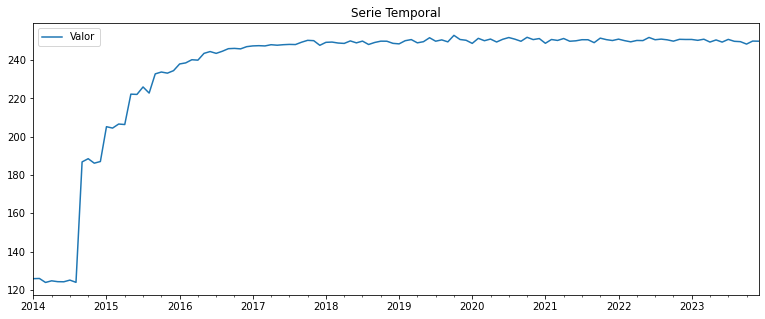

In [179]:
df50=crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,params_ARMA,s,phi,[],a)

In [185]:
csv_df(df50,'Ejemplos/ARMA','AR-estacional-fin')

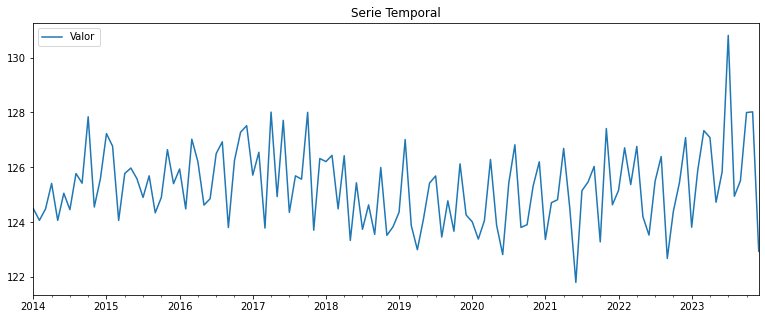

In [181]:
df51=crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,params_ARMA,s,[],teta,a)

In [187]:
csv_df(df51,'Ejemplos/ARMA','MA-estacional-fin')

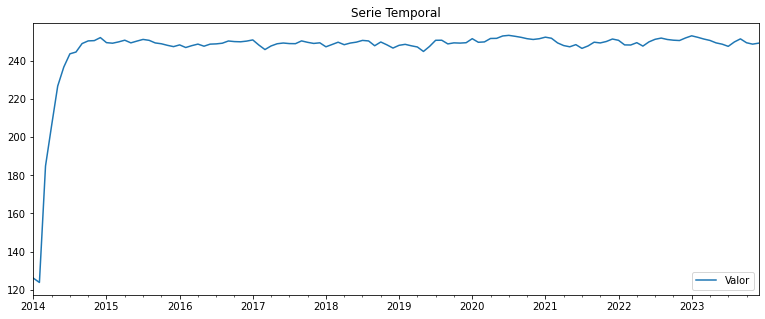

In [183]:
df52=crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,params_ARMA,0,phi,teta,a)

In [188]:
csv_df(df52,'Ejemplos/ARMA','ARMA-fin')

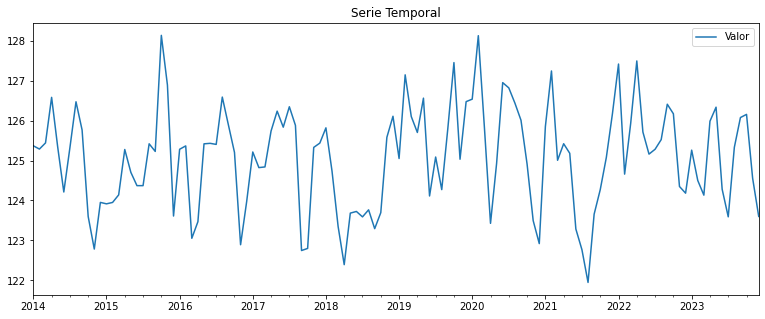

In [189]:
df53=crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,params_ARMA,0,[],teta,a)

In [191]:
csv_df(df53,'Ejemplos/ARMA','MA-fin')

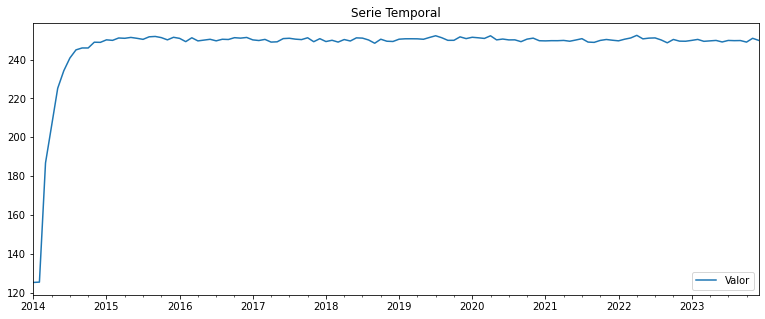

In [192]:
df54=crear_df_fin_ARMA(fecha1,fecha2,'M',columna,c,params_ARMA,0,phi,[],a)

In [193]:
csv_df(df54,'Ejemplos/ARMA','AR-fin')

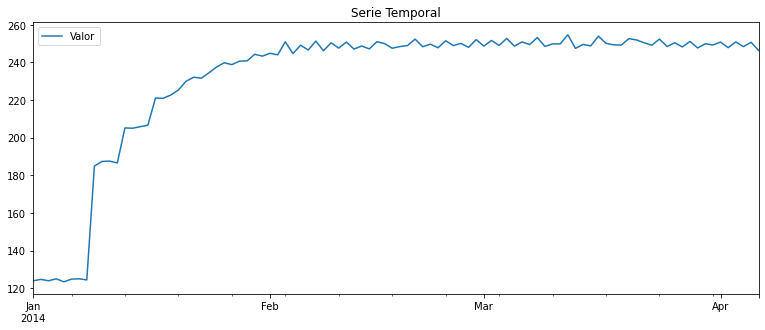

In [194]:
df55=crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,params_ARMA,s,phi,teta,a)

In [195]:
csv_df(df55,'Ejemplos/ARMA','ARMA-estacional-periodos')

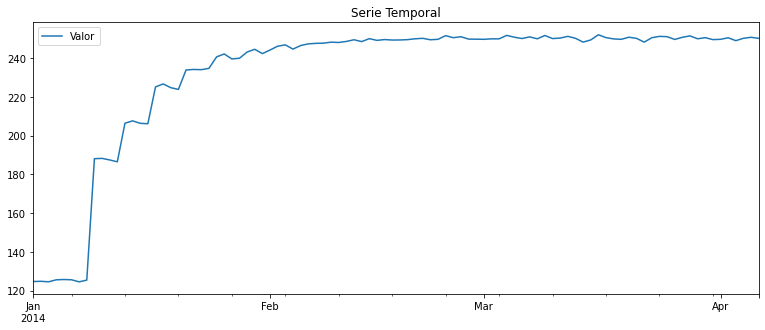

In [196]:
df56=crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,params_ARMA,s,phi,[],a)

In [197]:
csv_df(df56,'Ejemplos/ARMA','AR-estacional-periodos')

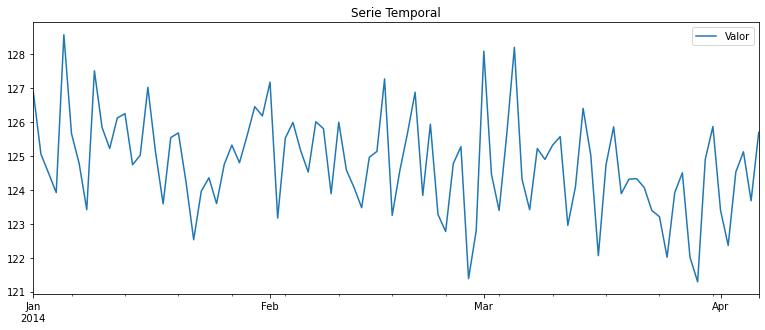

In [198]:
df57=crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,params_ARMA,s,[],teta,a)

In [199]:
csv_df(df55,'Ejemplos/ARMA','MA-estacional-periodos')

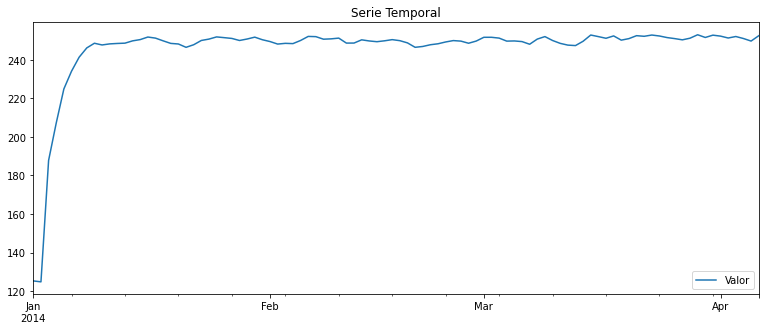

In [200]:
df56=crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,params_ARMA,0,phi,teta,a)

In [201]:
csv_df(df56,'Ejemplos/ARMA','ARMA-periodos')

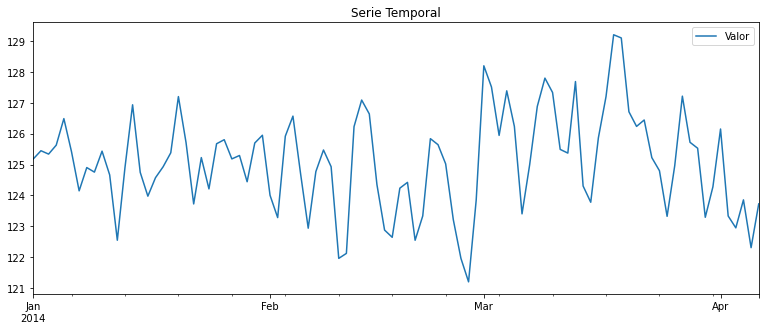

In [208]:
df57=crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,params_ARMA,0,[],teta,a)

In [209]:
csv_df(df57,'Ejemplos/ARMA','MA-periodos')

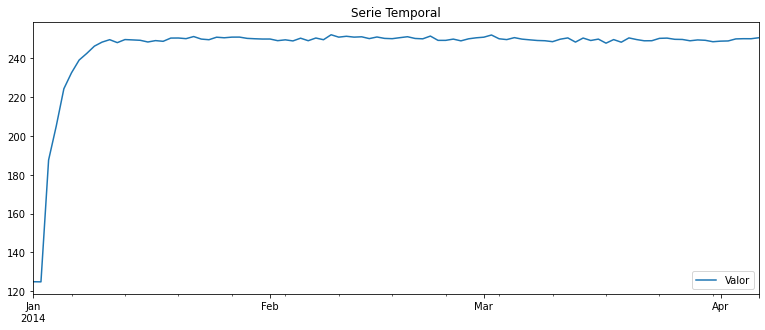

In [207]:
df58=crear_df_periodos_ARMA(fecha1,periodos,'D',columna,c,params_ARMA,0,phi,[],a)

In [210]:
csv_df(df58,'Ejemplos/ARMA','AR-periodos')

MODELOS CON DRIFT

In [212]:
paramsD1=[1,[350,23]]
paramsD2=[2,[20,0.6,200]]

In [213]:
params_ARMA1 = [250,0.6,3, [0.2,0.4],[0.3],[]]
params_ARMA2 = [270,1.5,0, [0.8],[0.3,0.25],[]]

In [214]:
params_per1= [1,1,[200,14],4]
params_per2= [2,1,[250,21],4]

In [215]:
params_tend1 = [[200,0.3],1,0.3]
params_tend2 = [[150,-4,0.2],2,0.15]

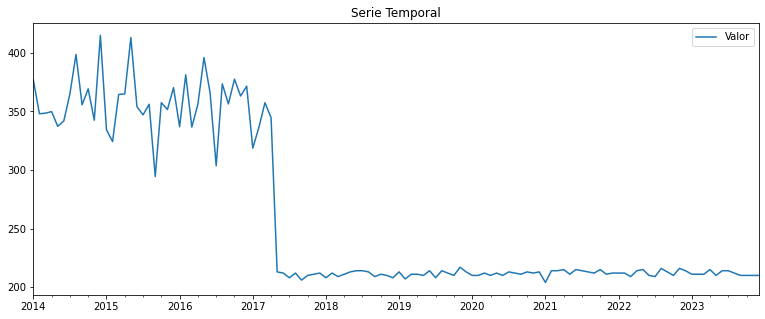

In [216]:
df59=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD1,paramsD2,1,40)

In [261]:
csv_df(df59,'Ejemplos/DRIFT','DIST-DIST-fin')

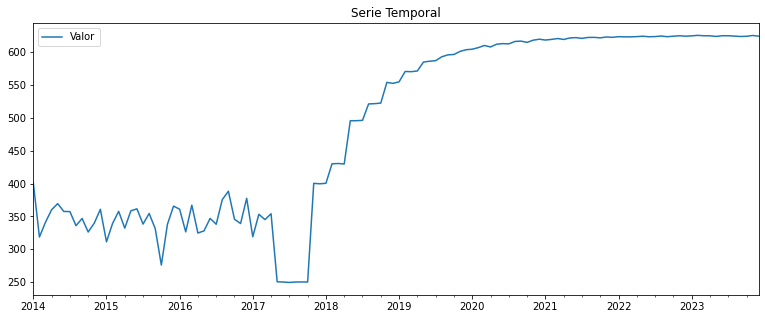

In [218]:
df60=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD1,params_ARMA1,2,40)

In [230]:
csv_df(df60,'Ejemplos/DRIFT','DIST-ARMA-fin')

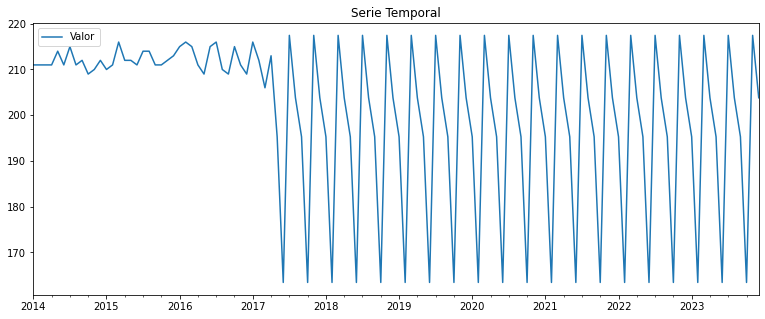

In [220]:
df61=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD2,params_per1,3,40)

In [231]:
csv_df(df61,'Ejemplos/DRIFT','DIST-PERIODICA-fin')

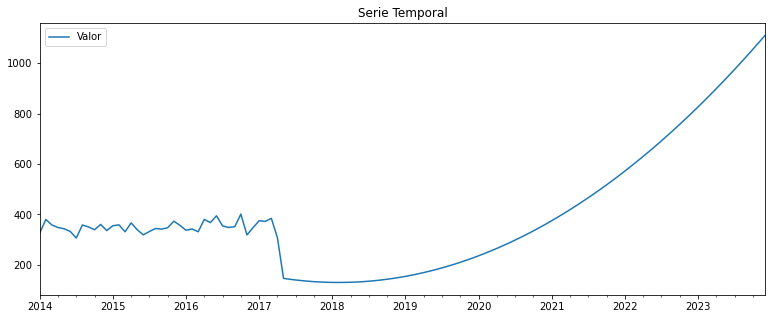

In [222]:
df62=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,paramsD1,params_tend2,4,40)

In [304]:
csv_df(df62,'Ejemplos/DRIFT','DIST-TENDENCIA-fin')

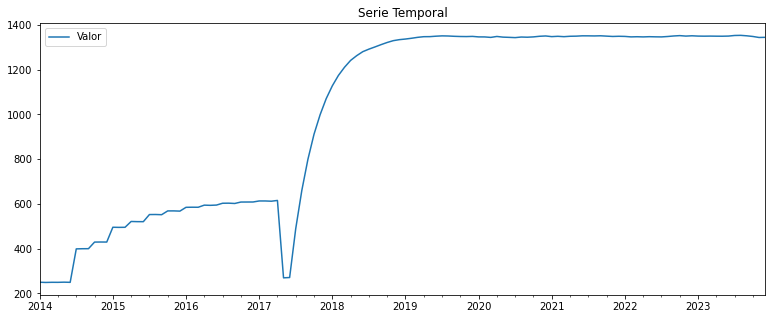

In [224]:
df63=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA1,params_ARMA2,5,40)

In [236]:
csv_df(df63,'Ejemplos/DRIFT','ARMA-ARMA-fin')

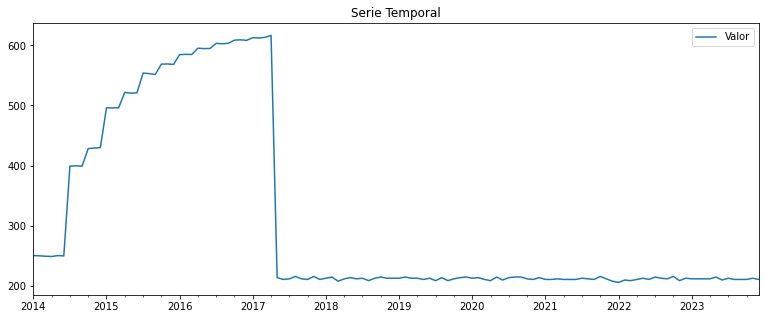

In [226]:
df64=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA1,paramsD2,6,40)

In [234]:
csv_df(df64,'Ejemplos/DRIFT','ARMA-DIST-fin')

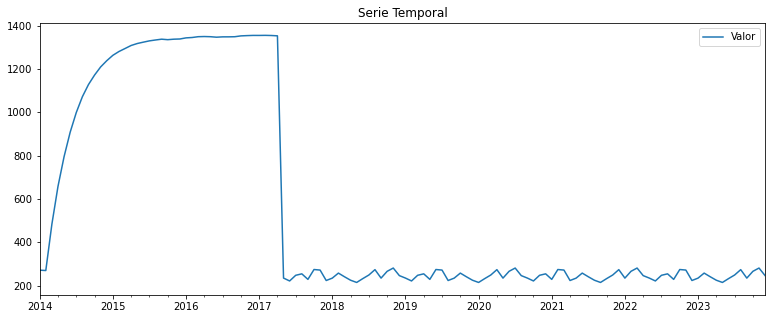

In [235]:
df65=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA2,params_per2,7,40)

In [237]:
csv_df(df65,'Ejemplos/DRIFT','ARMA-PERIODICA-fin')

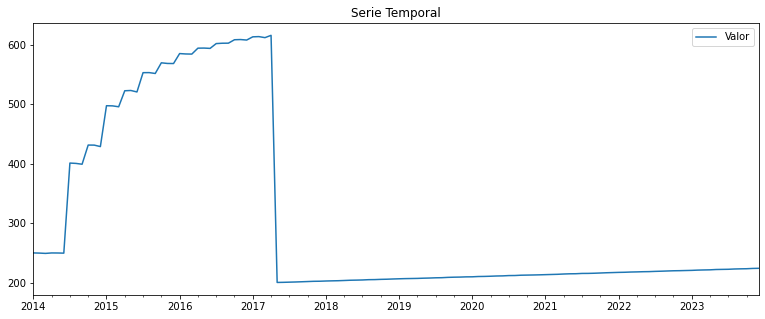

In [238]:
df66=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_ARMA1,params_tend1,8,40)

In [239]:
csv_df(df66,'Ejemplos/DRIFT','ARMA-TENDENCIA-fin')

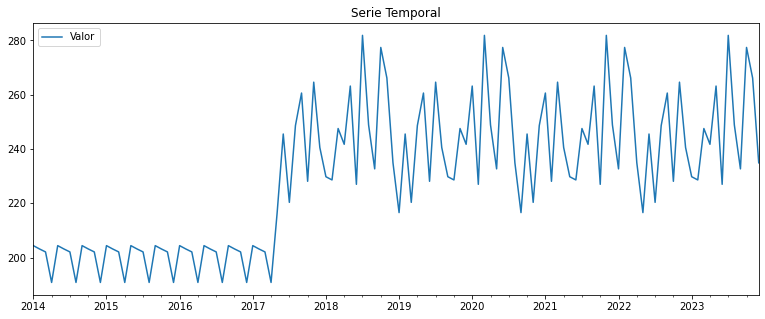

In [240]:
df67=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per1,params_per2,9,40)

In [241]:
csv_df(df67,'Ejemplos/DRIFT','PERIODICA-PERIODICA-fin')

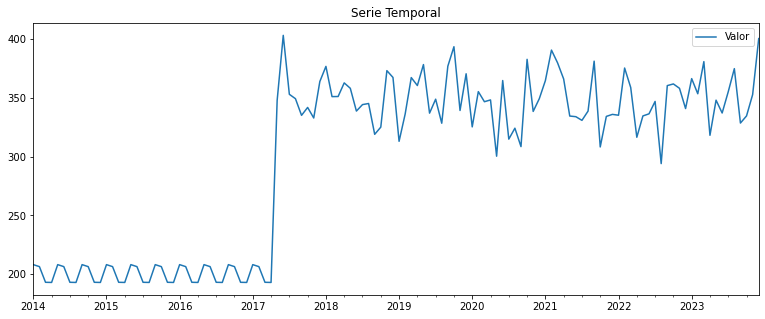

In [242]:
df68=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per1,paramsD1,10,40)

In [244]:
csv_df(df68,'Ejemplos/DRIFT','PERIODICA-DIST-fin')

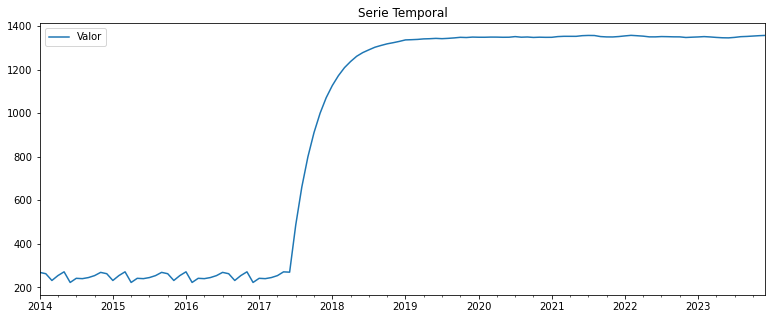

In [245]:
df69=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per2,params_ARMA2,11,40)

In [247]:
csv_df(df69,'Ejemplos/DRIFT','PERIODICA-ARMA-fin')

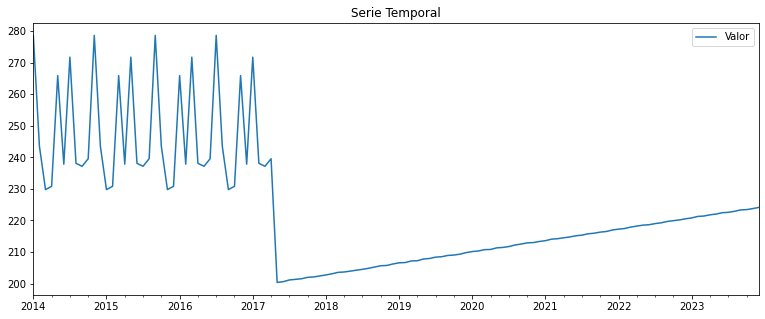

In [248]:
df70=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_per2,params_tend1,12,40)

In [249]:
csv_df(df70,'Ejemplos/DRIFT','PERIODICA-TENDENCIA-fin')

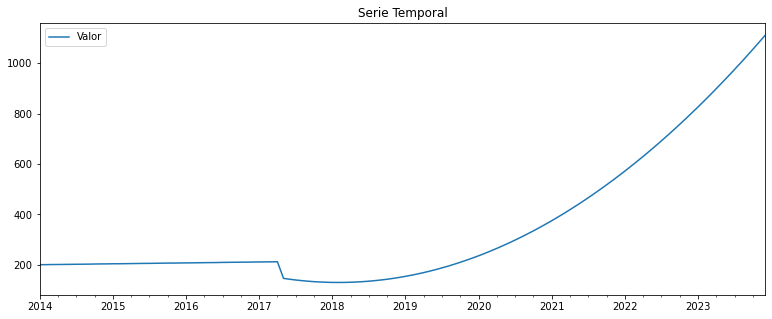

In [250]:
df71=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend1,params_tend2,13,40)

In [252]:
csv_df(df71,'Ejemplos/DRIFT','TENDENCIA-TENDENCIA-fin')

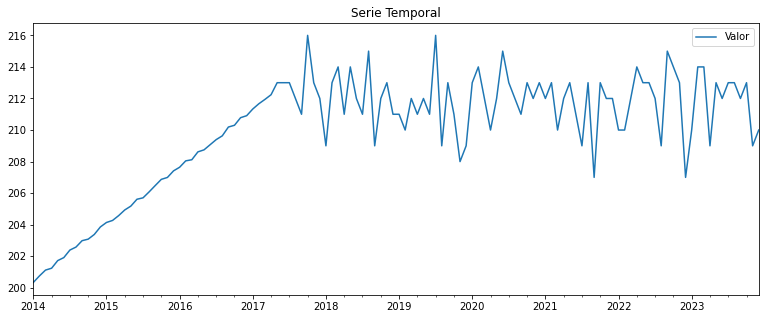

In [253]:
df72=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend1,paramsD2,14,40)

In [254]:
csv_df(df72,'Ejemplos/DRIFT','TENDENCIA-DIST-fin')

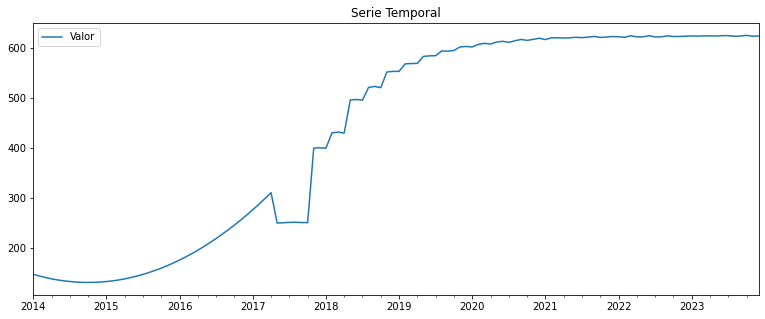

In [255]:
df73=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend2,params_ARMA1,15,40)

In [256]:
csv_df(df73,'Ejemplos/DRIFT','TENDENCIA-ARMA-fin')

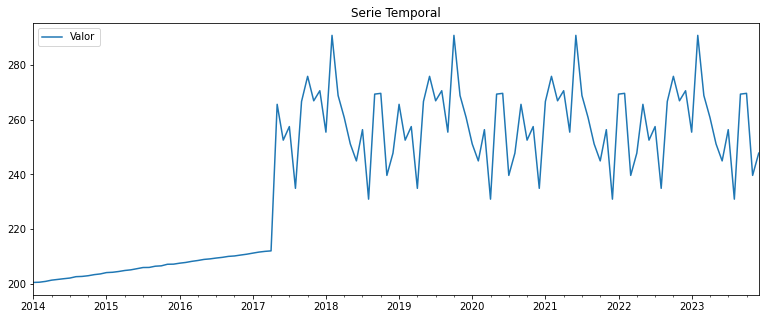

In [257]:
df74=crear_df_fin_DRIFT(fecha1,fecha2,'M',columna,params_tend1,params_per2,16,40)

In [258]:
csv_df(df74,'Ejemplos/DRIFT','TENDENCIA-PERIODICA-fin')

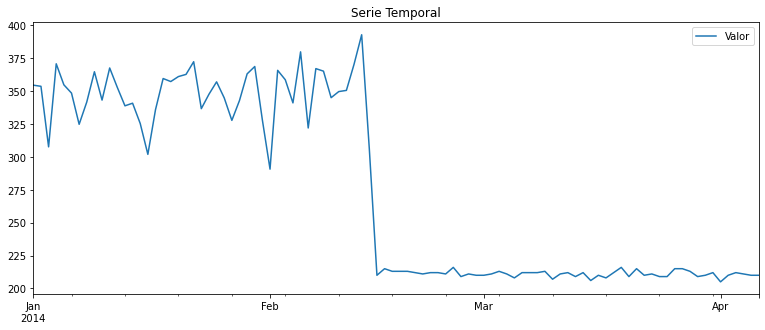

In [259]:
df75=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD1,paramsD2,1,45)

In [260]:
csv_df(df75,'Ejemplos/DRIFT','DIST-DIST-periodicos')

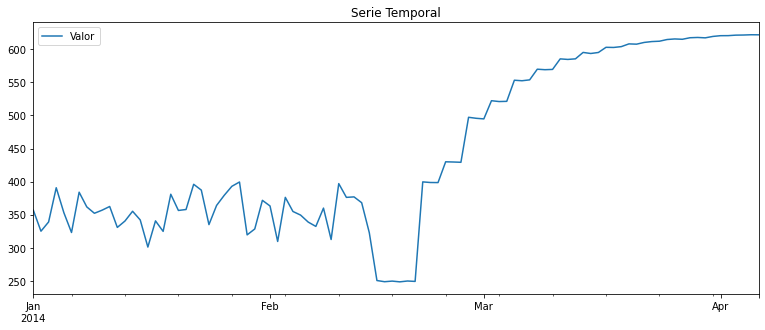

In [262]:
df76=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD1,params_ARMA1,2,45)

In [263]:
csv_df(df76,'Ejemplos/DRIFT','DIST-ARMA-periodicos')

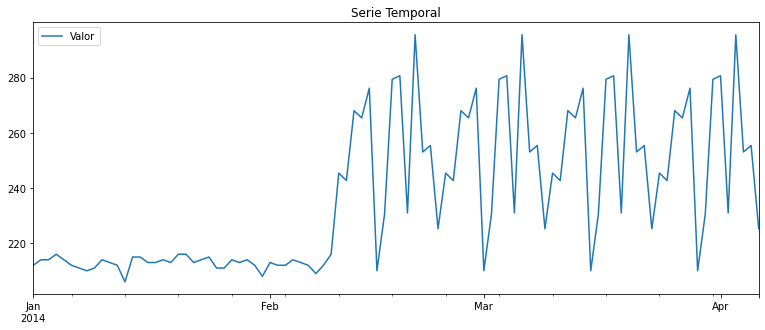

In [264]:
df77=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD2,params_per2,3,40)

In [265]:
csv_df(df77,'Ejemplos/DRIFT','DIST-PERIODICA-periodicos')

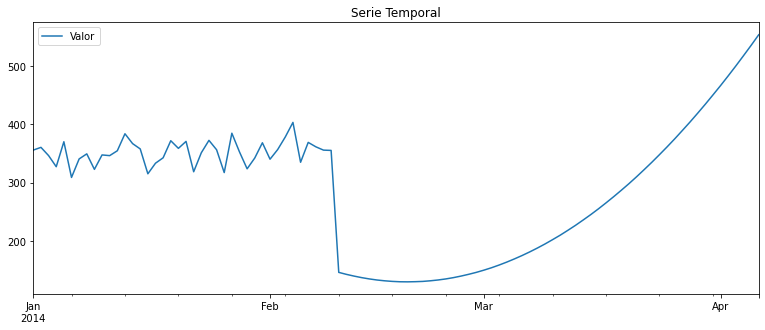

In [267]:
df78=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,paramsD1,params_tend2,4,40)

In [268]:
csv_df(df78,'Ejemplos/DRIFT','DIST-TENDENCIA-periodicos')

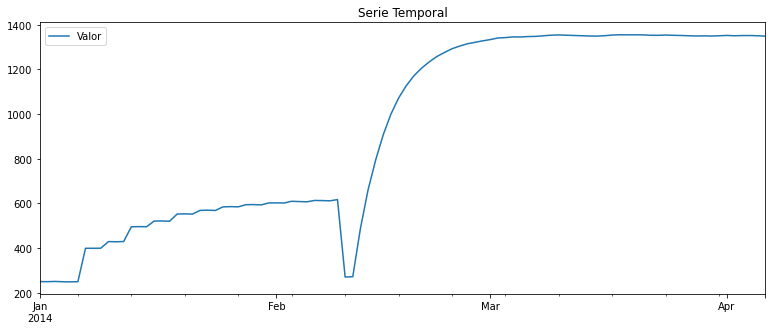

In [269]:
df79=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA1,params_ARMA2,5,40)

In [270]:
csv_df(df79,'Ejemplos/DRIFT','ARMA-ARMA-periodicos')

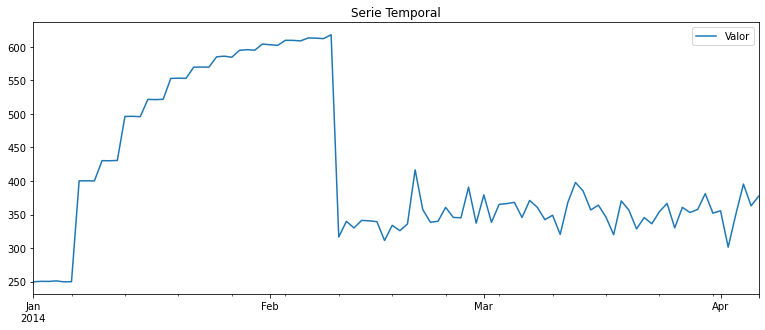

In [271]:
df80=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA1,paramsD1,6,40)

In [272]:
csv_df(df80,'Ejemplos/DRIFT','ARMA-DIST-periodicos')

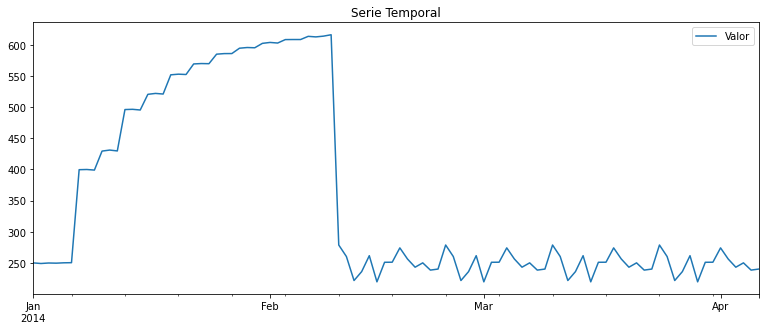

In [273]:
df81=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA1,params_per2,7,40)

In [274]:
csv_df(df81,'Ejemplos/DRIFT','ARMA-PERIODICA-periodicos')

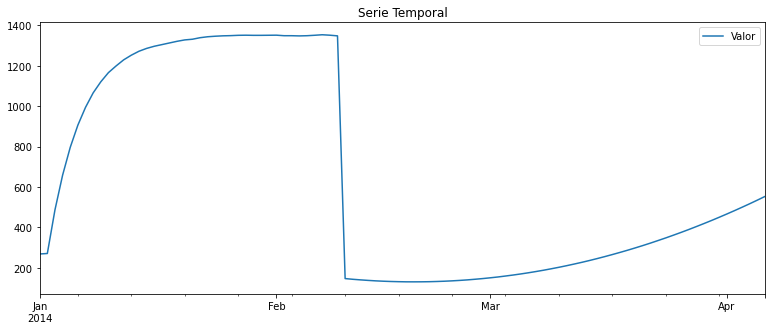

In [276]:
df82=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_ARMA2,params_tend2,8,40)

In [279]:
csv_df(df82,'Ejemplos/DRIFT','ARMA-TENDENCIA-periodicos')

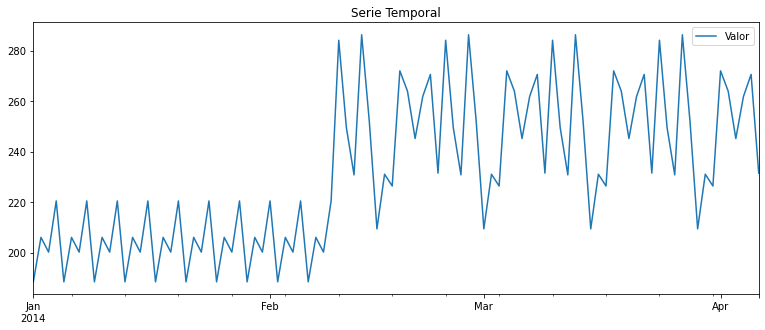

In [280]:
df83=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per1,params_per2,9,40)

In [281]:
csv_df(df83,'Ejemplos/DRIFT','PERIODICA-PERIODICA-periodicos')

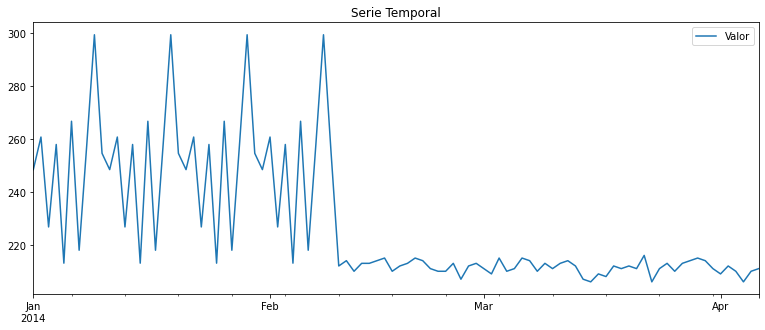

In [282]:
df84=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per2,paramsD2,10,40)

In [283]:
csv_df(df84,'Ejemplos/DRIFT','PERIODICA-DIST-periodicos')

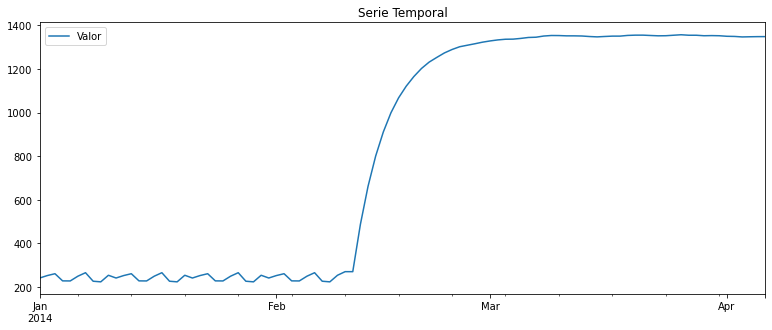

In [284]:
df85=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per2,params_ARMA2,11,40)

In [286]:
csv_df(df85,'Ejemplos/DRIFT','PERIODICA-ARMA-periodicos')

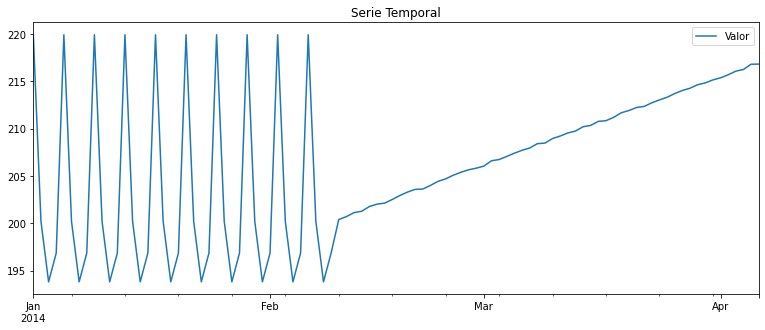

In [288]:
df86=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_per1,params_tend1,12,40)

In [289]:
csv_df(df86,'Ejemplos/DRIFT','PERIODICA-TENDENCIA-periodicos')

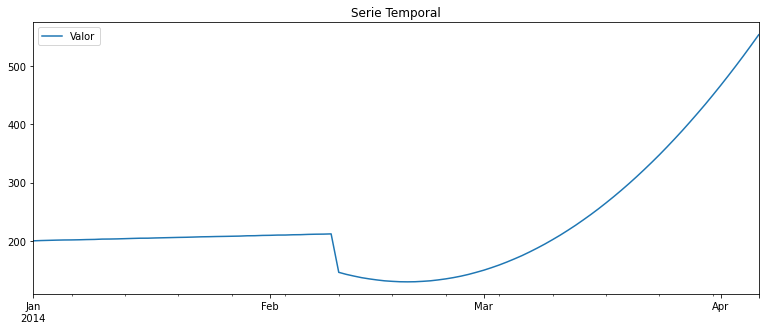

In [297]:
df87=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend1,params_tend2,13,40)

In [298]:
csv_df(df87,'Ejemplos/DRIFT','TENDENCIA-TENDENCIA-periodicos')

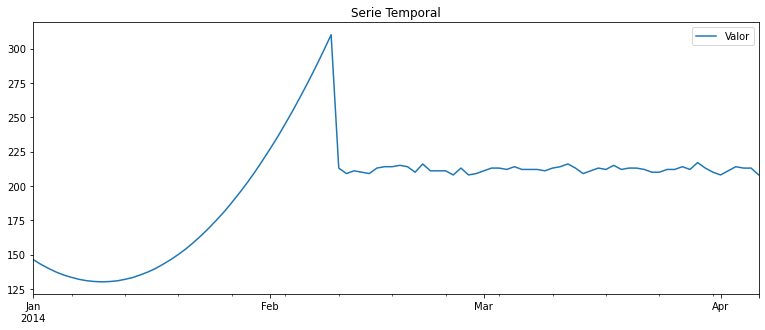

In [293]:
df88=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend2,paramsD2,14,40)

In [295]:
csv_df(df88,'Ejemplos/DRIFT','TENDENCIA-DIST-periodicos')

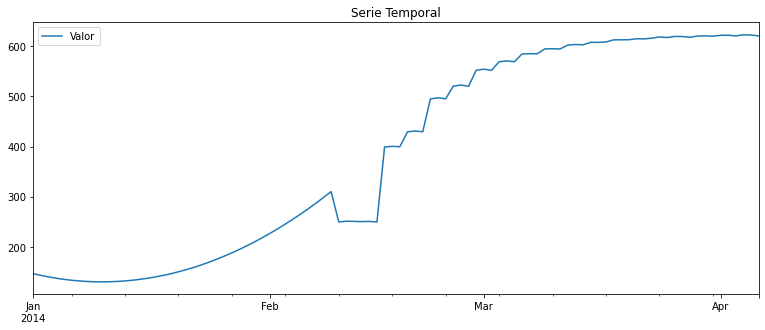

In [299]:
df89=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend2,params_ARMA1,15,40)

In [301]:
csv_df(df89,'Ejemplos/DRIFT','TENDENCIA-ARMA-periodicos')

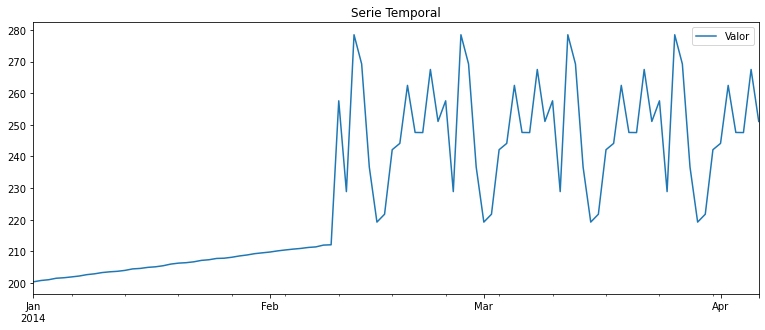

In [302]:
df90=crear_df_periodos_DRIFT(fecha1,periodos,'D',columna,params_tend1,params_per2,16,40)

In [303]:
csv_df(df86,'Ejemplos/DRIFT','TENDENCIA-PERIDICA-periodicos')

PRUEBAS EJEMPLOS MULTIVARIABLES:

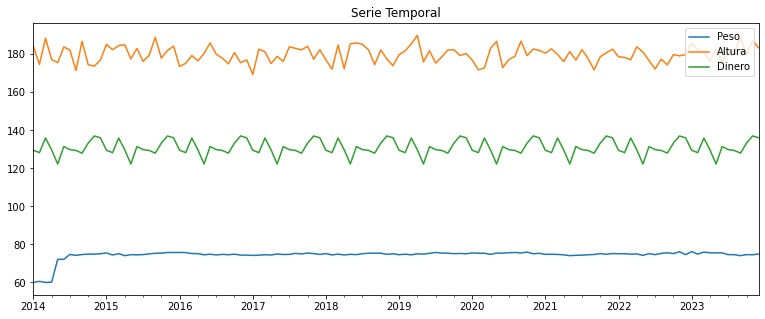

In [14]:
df1 = crear_df_multi_fin(fecha1,fecha2,'M',['Peso','Altura','Dinero'],[[60,0.3,2,[0.2],[0.9,0.3],[]],[1,[180,4]],[1,1,[130,5],12]],[2,1,3])

In [15]:
df1

,Peso,Altura,Dinero
2014-01-31,60.006824,184.283912,129.521279
2014-02-28,60.579878,174.618668,128.256865
2014-03-31,59.998808,188.447262,135.943293
2014-04-30,60.126456,177.233892,129.712588
2014-05-31,72.159411,175.533401,122.272357
...,...,...,...
2023-08-31,74.614036,181.114479,129.403572
2023-09-30,74.091110,188.663801,127.982913
2023-10-31,74.629219,180.123980,133.249624
2023-11-30,74.559228,187.139782,137.027146


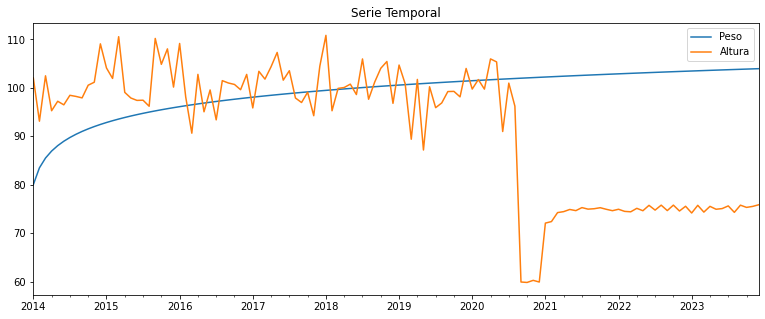

In [18]:
df2 = crear_df_multi_fin(fecha1,fecha2,'M',['Peso','Altura'],[[[80,5],4,0.15],[[1,[100,4]],[60,0.3,2,[0.2],[0.9,0.3],[]],2,80]],[4,5])